### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Set seed for reproducibility
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)


2024-06-15 21:58:52.596171: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 21:58:52.636244: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 21:58:52.636302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 21:58:52.637491: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-15 21:58:52.647105: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 21:58:52.647626: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [42]:
import math
# Parameters, try to change them and see what happens
N_epochs = 25 # number of epochs
sigma =0.1 # noise level
N_train = 250 # number of training data
N_batch = math.floor(N_train/16) # batch size

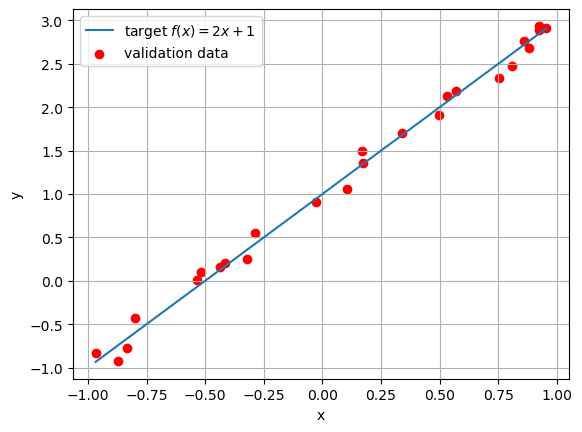

In [43]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, int(0.1*N_train))
x_valid.sort() # for a better plot
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target, label='target $f(x) = 2x+1$')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [44]:
# compose the NN model

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 


Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=N_batch, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/25
17/17 [==============================] - 0s 5ms/step - loss: 2.2384 - mse: 2.2384 - val_loss: 2.5948 - val_mse: 2.5948
Epoch 2/25
17/17 [==============================] - 0s 1ms/step - loss: 1.6039 - mse: 1.6039 - val_loss: 1.8957 - val_mse: 1.8957
Epoch 3/25
17/17 [==============================] - 0s 1ms/step - loss: 1.1915 - mse: 1.1915 - val_loss: 1.4186 - val_mse: 1.4186
Epoch 4/25
17/17 [==============================] - 0s 1ms/step - loss: 0.9103 - mse: 0.9103 - val_loss: 1.0858 - val_mse: 1.0858
Epoch 5/25
17/17 [==============================] - 0s 1ms/step - loss: 0.7085 - mse: 0.7085 - val_loss: 0.8429 - val_mse: 0.8429
Epoch 6/25
17/17 [==============================] - 0s 1ms/step - loss: 0.5603 - mse: 0.5603 - val_loss: 0.6607 - val_mse: 0.6607
Epoch 7/25
17/17 [==============================] - 0s 1ms/step - loss: 0.4463 - mse: 0.4463 - val_loss: 0.5198 - val_mse: 0.5198
Epoch 8/25
17/17 [==============================] - 0s 1ms/step - loss: 0.3573 - mse: 0.35

In [46]:
# return weights and biases
model.get_weights()

[array([[1.8511747]], dtype=float32), array([0.9863113], dtype=float32)]

In [47]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 13ms/step - loss: 0.0175 - mse: 0.0175

Test loss: 0.01752490922808647
Test accuracy: 0.01752490922808647


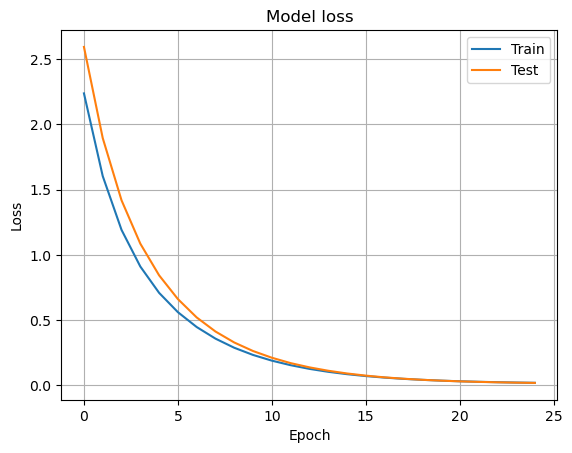

In [48]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# save results to file for later use
epochs = range(1, len(history.history['loss']) + 1)
data = {
    'epoch': epochs,
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}
df = pd.DataFrame(data)  
# df.to_csv(f'DATA/linear/N_epochs/loss{N_epochs}.dat', index=False, header=False, sep=' ')
# df.to_csv(f'DATA/linear/sigma/loss{sigma}.dat', index=False, header=False, sep=' ')
df.to_csv(f'DATA/linear/N_train/loss{N_train}.dat', index=False, header=False, sep=' ')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

4/4 [==============================] - 0s 932us/step


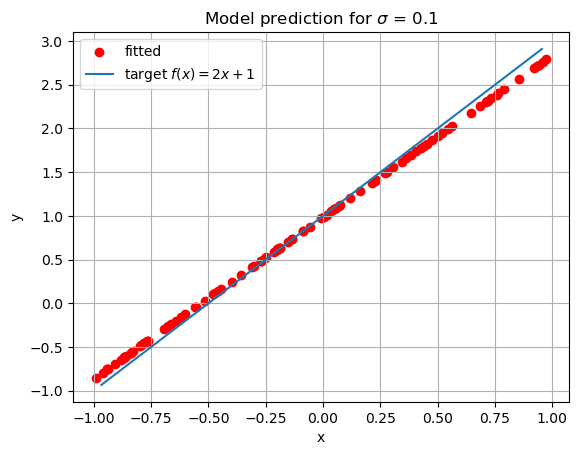

In [49]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='fitted')
plt.plot(x_valid, y_target, label='target $f(x) = 2x+1$')
plt.title(r'Model prediction for $\sigma$ = ' + str(sigma))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Ensure x_predicted and y_predicted are 1-dimensional
x_predicted = np.ravel(x_predicted)
y_predicted = np.ravel(y_predicted)

# save data in a file
df = pd.DataFrame({'x': x_predicted,'y':y_predicted})
# df.to_csv(f'DATA/linear/N_epochs/N_epochs_{N_epochs}.dat', index=False, header=False, sep=' ')
# df.to_csv(f'DATA/linear/sigma/sigma_{sigma}.dat', index=False, header=False, sep=' ')
df.to_csv(f'DATA/linear/N_train/N_train_{N_train}.dat', index=False, header=False, sep=' ')